In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
os.sys.path.append('D:\ml\datasets')

import tensorflow as tf
import keras
import keras.backend as K

from net import densenet
from cifar10 import Cifar10
import numpy as np
import matplotlib.pyplot as plt
sess = K.get_session()

%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
num_per_epoches_for_train = 50000
num_per_epoches_for_test = 10000
data_path = r'D:\ml\datasets\cifar-10-batches-bin'

In [3]:
cifar10_train = Cifar10(batch_size=batch_size, 
                        training=True, 
                        image_augment=True, 
                        path=data_path)

cifar10_test = Cifar10(batch_size=batch_size, 
                        training=False,
                        path=data_path)

In [4]:
train_images_tensor, train_labels_tensor = cifar10_train.get_tensor()
test_images_tensor, test_labels_tensor = cifar10_test.get_tensor()

In [5]:
def train_data_generator():
    while True:
        images, labels = sess.run([train_images_tensor, train_labels_tensor])
        yield images, labels

In [6]:
def test_data_generator():
    while True:
        images, labels = sess.run([test_images_tensor, test_labels_tensor])
        yield images, labels

In [7]:
model = densenet.DenseNetBC40((32,32,3), 10)

In [ ]:
model = keras.models.load_model('densenet_cifar10_keras.h5')

In [8]:
optimizer=keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [9]:
tensorboard = keras.callbacks.TensorBoard(batch_size=batch_size, write_graph=False)

In [10]:
history = model.fit_generator(generator=train_data_generator(), 
                    steps_per_epoch=num_per_epoches_for_train // batch_size, 
                    epochs = 50, 
                    validation_data=test_data_generator(), 
                    validation_steps=num_per_epoches_for_test // batch_size,callbacks=[tensorboard])

Epoch 1/50
390/390 [==============================] - 55s 142ms/step - loss: 1.3866 - acc: 0.4966 - val_loss: 1.7097 - val_acc: 0.4700
Epoch 2/50
390/390 [==============================] - 51s 130ms/step - loss: 0.9570 - acc: 0.6603 - val_loss: 1.1636 - val_acc: 0.6032
Epoch 3/50
390/390 [==============================] - 51s 130ms/step - loss: 0.7872 - acc: 0.7213 - val_loss: 0.9386 - val_acc: 0.6770
Epoch 4/50
390/390 [==============================] - 51s 130ms/step - loss: 0.6735 - acc: 0.7643 - val_loss: 0.8943 - val_acc: 0.7074
Epoch 5/50
390/390 [==============================] - 51s 131ms/step - loss: 0.6063 - acc: 0.7891 - val_loss: 0.6031 - val_acc: 0.7928
Epoch 6/50
390/390 [==============================] - 51s 131ms/step - loss: 0.5439 - acc: 0.8108 - val_loss: 0.8607 - val_acc: 0.7140
Epoch 7/50
390/390 [==============================] - 51s 130ms/step - loss: 0.5008 - acc: 0.8258 - val_loss: 0.5868 - val_acc: 0.7966
Epoch 8/50
390/390 [==============================] - 5

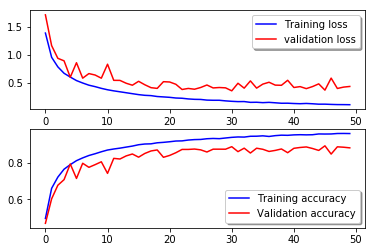

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
optimizer=keras.optimizers.Adam(lr=1e-6)
model.compile(optimizer=optimizer, 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit_generator(generator=train_data_generator(), 
                    steps_per_epoch=num_per_epoches_for_train // batch_size, 
                    epochs = 10, 
                    validation_data=test_data_generator(), 
                    validation_steps=num_per_epoches_for_test // batch_size,callbacks=[tensorboard])

Epoch 1/10
390/390 [==============================] - 58s 147ms/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.3244 - val_acc: 0.9169
Epoch 2/10
390/390 [==============================] - 55s 141ms/step - loss: 0.0306 - acc: 0.9903 - val_loss: 0.3238 - val_acc: 0.9171
Epoch 3/10
390/390 [==============================] - 55s 141ms/step - loss: 0.0310 - acc: 0.9894 - val_loss: 0.3235 - val_acc: 0.9172
Epoch 4/10
390/390 [==============================] - 55s 141ms/step - loss: 0.0315 - acc: 0.9897 - val_loss: 0.3231 - val_acc: 0.9171
Epoch 5/10
390/390 [==============================] - 55s 142ms/step - loss: 0.0306 - acc: 0.9898 - val_loss: 0.3241 - val_acc: 0.9170
Epoch 6/10
390/390 [==============================] - 55s 141ms/step - loss: 0.0303 - acc: 0.9903 - val_loss: 0.3239 - val_acc: 0.9171
Epoch 7/10
390/390 [==============================] - 55s 141ms/step - loss: 0.0316 - acc: 0.9893 - val_loss: 0.3241 - val_acc: 0.9169
Epoch 8/10
390/390 [==============================] - 5

In [15]:
model.save(r'densenet_cifar10_keras_acc_91.68%.h5')

In [ ]:
cifar10_predict = Cifar10(batch_size=1, training=False, path=data_path)
images_tensor, labels_tensor = cifar10_predict.get_tensor()


In [ ]:
images, labels = sess.run([images_tensor, labels_tensor])
predict = model.predict(images)
predict = np.argmax(predict)
print('predict = ', predict)
plt.imshow(images[0])

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(model, to_file='a.jpg', show_shapes=True)